In [104]:
# Cherry blossom analysis

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

In [106]:
cherry = pd.read_csv('cherry.csv')
cherry

,YEAR,FLOWERING_DOY
0,801,NaN
1,802,NaN
2,803,NaN
3,804,NaN
4,805,NaN
...,...,...
1212,2013,93.0
1213,2014,94.0
1214,2015,93.0
1215,2020,90.0


In [107]:
# Forward fill missing values based on last known value
cherry['DOY'] = cherry['FLOWERING_DOY'].fillna(method='ffill') #.fillna(method='bfill')
cherry.dropna(inplace=True)  # In class, I needed to add "inplace=True" to avoid the warnings

print("FORWARD FILL: ", list(cherry.DOY))

FORWARD FILL:  [92.0, 105.0, 96.0, 108.0, 104.0, 100.0, 106.0, 95.0, 104.0, 109.0, 108.0, 106.0, 104.0, 104.0, 102.0, 98.0, 95.0, 110.0, 95.0, 104.0, 98.0, 97.0, 106.0, 109.0, 107.0, 95.0, 89.0, 112.0, 109.0, 97.0, 101.0, 87.0, 94.0, 104.0, 98.0, 103.0, 98.0, 107.0, 108.0, 101.0, 112.0, 104.0, 94.0, 100.0, 104.0, 105.0, 117.0, 100.0, 106.0, 115.0, 111.0, 99.0, 113.0, 98.0, 116.0, 97.0, 111.0, 102.0, 96.0, 104.0, 103.0, 103.0, 112.0, 105.0, 108.0, 92.0, 105.0, 113.0, 103.0, 102.0, 96.0, 120.0, 104.0, 105.0, 105.0, 100.0, 96.0, 100.0, 103.0, 104.0, 108.0, 114.0, 105.0, 113.0, 104.0, 100.0, 109.0, 102.0, 104.0, 112.0, 98.0, 111.0, 108.0, 107.0, 111.0, 106.0, 103.0, 103.0, 106.0, 113.0, 103.0, 111.0, 110.0, 107.0, 109.0, 96.0, 90.0, 103.0, 112.0, 112.0, 100.0, 106.0, 95.0, 111.0, 112.0, 113.0, 103.0, 117.0, 112.0, 113.0, 113.0, 103.0, 98.0, 104.0, 101.0, 115.0, 115.0, 104.0, 107.0, 112.0, 106.0, 119.0, 109.0, 104.0, 96.0, 106.0, 105.0, 110.0, 105.0, 104.0, 112.0, 98.0, 107.0, 102.0, 108.0,

In [108]:
# Compute moving averages
cherry['MA_10'] = cherry['DOY'].rolling(window=10, center=True, min_periods=1).mean()
cherry['MA_100'] = cherry['DOY'].rolling(window=100, center=True, min_periods=1).mean()


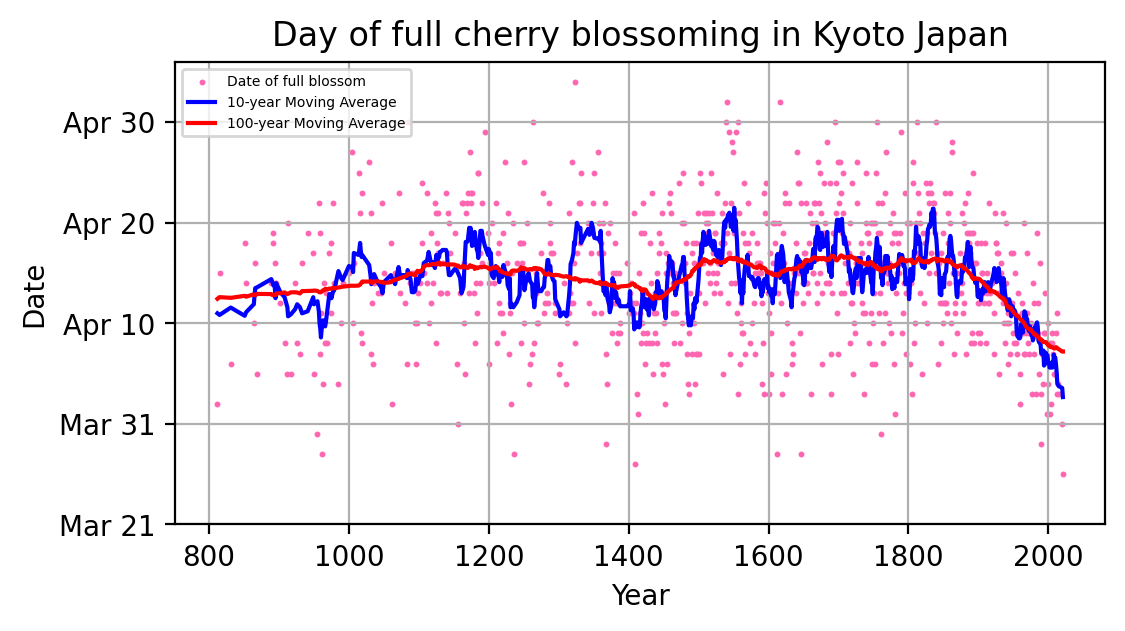

In [111]:
plt.figure(figsize=(6,3), dpi=200)
plt.scatter(cherry.YEAR, cherry.DOY, marker='.', s=5, color='#FF66B2', label='Date of full blossom')
plt.plot(cherry.YEAR, cherry.MA_10, color='blue', label='10-year Moving Average')
plt.plot(cherry.YEAR, cherry.MA_100, color='red', label='100-year Moving Average')
plt.yticks([80,90,100,110,120], ['Mar 21', 'Mar 31', 'Apr 10', 'Apr 20', 'Apr 30'])
plt.xlabel('Year')
plt.ylabel('Date')
plt.title('Day of full cherry blossoming in Kyoto Japan')
plt.legend(prop={'size':5})
plt.grid()
plt.savefig('cherry.png') # Save the image to a file! Do this if your image isn't embedded in the notebook.
plt.show()